### 1.4.1 슬롯머신 구현

In [19]:
import numpy as np

# Bandit 클래스 구현
class Bandit:
    def __init__(self, arms=10):
        self.rates = np.random.rand(arms)
    
    def play(self, arm):
        rate = self.rates[arm]
        if rate > np.random.rand():
            return 1
        else:
            return 0

bandit = Bandit()
for i in range(3):
    print(bandit.play(0))

1
1
1


### 1.4.2 에이전트 구현

In [20]:
# 0번째 슬롯머신 10번 연속으로 플레이하고 보상 받을 때마다 슬롯머신의 가치 추정치
bandit = Bandit()
Qs = np.zeros(10)
ns = np.zeros(10)

for n in range(10):
    action = np.random.randint(0, 10)
    reward = bandit.play(action)

    ns[action] += 1
    Qs[action] += (reward - Qs[action]) / ns[action]
    print(Qs)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]


In [21]:
# 0번째 슬롯머신에만 집중하여 해당 슬롯머신의 가치를 추정
bandit = Bandit()
Q = 0

for n in range(1, 11):
    reward = bandit.play(0)
    Q += (reward - Q) / n
    print(Q)

0.0
0.0
0.3333333333333333
0.5
0.4
0.5
0.4285714285714286
0.375
0.3333333333333333
0.4


In [22]:
# Agent 클래스 구현
class Agent:
    def __init__(self, epsilon, action_size=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)

    def update(self, action, reward):
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]
    
    def get_action(self): # 행동 선택 (ε-탐욕 정책)
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs)) # 무작위 행동 선택
        return np.argmax(self.Qs)

### 1.4.3 실행해보기

855


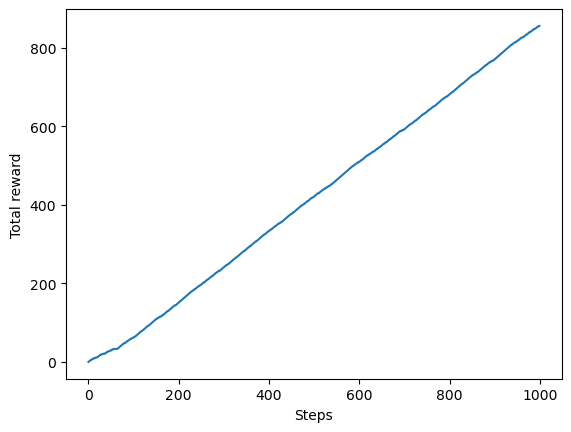

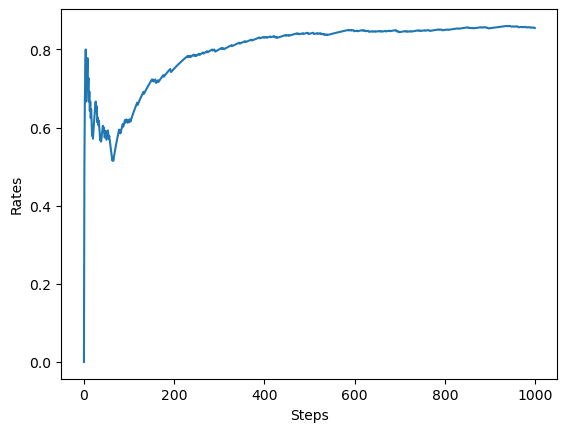

In [23]:
import matplotlib.pyplot as plt

steps = 1000
epsilon = 0.1

bandit = Bandit()
agent = Agent(epsilon)
total_reward = 0
total_rewards = [] # 보상 합
rates = [] # 승률

for step in range(steps):
    action = agent.get_action()  # 1. 행동 선택
    reward = bandit.play(action) # 2. 실제로 플레이하고 보상을 받음
    agent.update(action, reward) # 3. 행동과 보상을 통해 학습
    total_reward += reward

    total_rewards.append(total_reward) # 현재까지의 보상 합 저장
    rates.append(total_reward / (step + 1)) # 현재까지의 승률 저장

print(total_reward)

# 그래프 그리기: 단계별 보상 총합
plt.ylabel('Total reward')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()

# 그래프 그리기: 단계별 승률
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()

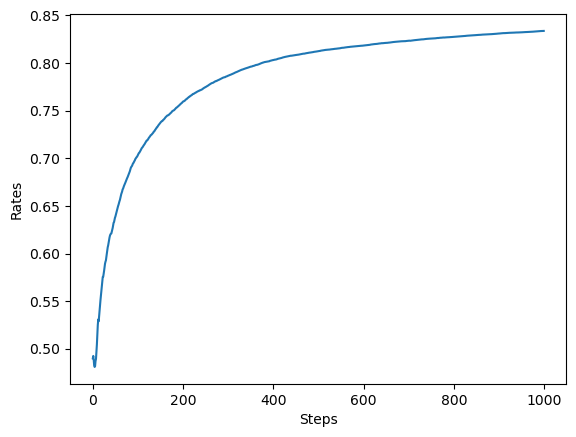

In [24]:
# 똑같은 실험 200번 수행 후 평균 계산
runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps)) # shape: (200, 1000)

for run in range(runs):
    bandit = Bandit()
    agent = Agent(epsilon)
    total_reward = 0
    total_rewards = []
    rates = []

    for step in range(steps):
        action = agent.get_action()
        reward = bandit.play(action)
        agent.update(action, reward)
        total_reward += reward

        total_rewards.append(total_reward)
        rates.append(total_reward / (step + 1))

    all_rates[run] = rates # 보상 결과 기록

avg_rates = np.average(all_rates, axis=0) # 각 단계별 평균 저장

# 그래프 그리기: 단계별 승률률
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(avg_rates)
plt.show()

## 1.5 비정상 문제
- 비정상 문제(non-stationary problem): 확률 분포가 변하도록 설정된 문제

In [25]:
class NonStatBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.rates = np.random.rand(arms)

    def play(self, arm):
        rate = self.rates[arm]
        
        # 노이즈 추가 => 비정상 문제 => 플레이할 때마다 슬롯머신의 가치(승률)가 달라짐
        self.rates += 0.1 * np.random.randn(self.arms)
        
        if rate > np.random.rand():
            return 1
        else:
            return 0

### 1.5.2 비정상 문제 풀기

In [26]:
class AlphaAgent:
    def __init__(self, epsilon, alpha, actions=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(actions)
        self.alpha = alpha
    
    def update(self, action, reward):
        # α로 갱신
        self.Qs[action] += (reward - self.Qs[action]) * self.alpha
    
    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)

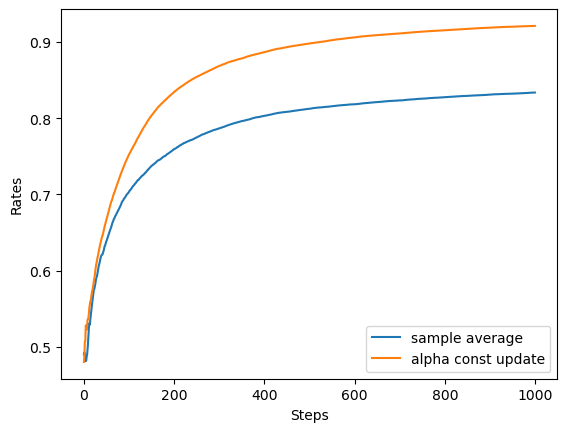

In [27]:
# 똑같은 실험 200번 수행 후 평균 계산
runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps)) # shape: (200, 1000)

for run in range(runs):
    bandit = Bandit()
    agent = Agent(epsilon)
    total_reward = 0
    total_rewards = []
    rates = []

    for step in range(steps):
        action = agent.get_action()
        reward = bandit.play(action)
        agent.update(action, reward)
        total_reward += reward

        total_rewards.append(total_reward)
        rates.append(total_reward / (step + 1))

    all_rates[run] = rates # 보상 결과 기록

sample_avg_rates = np.average(all_rates, axis=0) # 각 단계별 평균 저장

# 똑같은 실험 200번 수행 후 평균 계산
runs = 200
steps = 1000
epsilon = 0.1
alpha = 0.9
all_rates = np.zeros((runs, steps)) # shape: (200, 1000)

for run in range(runs):
    bandit = NonStatBandit()
    agent = AlphaAgent(epsilon, alpha)
    total_reward = 0
    total_rewards = []
    rates = []

    for step in range(steps):
        action = agent.get_action()
        reward = bandit.play(action)
        agent.update(action, reward)
        total_reward += reward

        total_rewards.append(total_reward)
        rates.append(total_reward / (step + 1))

    all_rates[run] = rates # 보상 결과 기록

alpha_rates = np.average(all_rates, axis=0) # 각 단계별 평균 저장

# 그래프 그리기: 단계별 승률률
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(avg_rates, label='sample average')
plt.plot(alpha_rates, label='alpha const update')
plt.legend()
plt.show()